# TechnoServe Lead‑Conversion Analysis
End‑to‑end exploratory data analysis & Keras model

## 1 · Setup & Data Import
Adjust `file_path` below if your dataset is stored elsewhere.

In [17]:
import pandas as pd
import numpy as np

# Update the path as needed
file_path = 'Sales Dataset.xlsx'  # placed in the same directory as the notebook
df = pd.read_excel(file_path)
print(f"Shape: {df.shape}")
df.head()

Shape: (78025, 13)


,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


## 2 · Data Overview

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Opportunity ID                  78025 non-null  object
 1   Technology
Primary              78025 non-null  object
 2   City                            78025 non-null  object
 3   B2B Sales Medium                78025 non-null  object
 4   Sales Velocity                  78025 non-null  int64 
 5   Opportunity Status              78025 non-null  object
 6   Sales Stage Iterations          78025 non-null  int64 
 7   Opportunity Size (USD)          78025 non-null  int64 
 8   Client Revenue Sizing           78025 non-null  object
 9   Client Employee Sizing          78025 non-null  object
 10  Business from Client Last Year  78025 non-null  object
 11  Compete Intel                   68768 non-null  object
 12  Opportunity Sizing              78025 non-null

In [19]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Opportunity ID,78025,78025,N00000001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Technology\nPrimary,78025,4,ERP Implementation,49810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,78025,7,Mumbai,21020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B2B Sales Medium,78025,5,Marketing,37262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales Velocity,78025.0,NaN,NaN,NaN,43.595348,26.5856,0.0,19.0,43.0,65.0,210.0
Opportunity Status,78025,2,Loss,60398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales Stage Iterations,78025.0,NaN,NaN,NaN,2.955732,1.497242,1.0,2.0,3.0,3.0,23.0
Opportunity Size (USD),78025.0,NaN,NaN,NaN,30085.664992,21169.932617,0.0,13816.0,29845.0,43185.0,149981.0
Client Revenue Sizing,78025,5,100K or less,59504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Client Employee Sizing,78025,5,1K or less,59348,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3 · Exploratory Data Analysis

/var/folders/4k/g_m21ftn66s0_p4_76fq2czr0000gn/T/ipykernel_87753/4096499445.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='B2B Sales Medium', y='Opportunity Status', estimator=lambda x: sum(x)/len(x), ci=None)


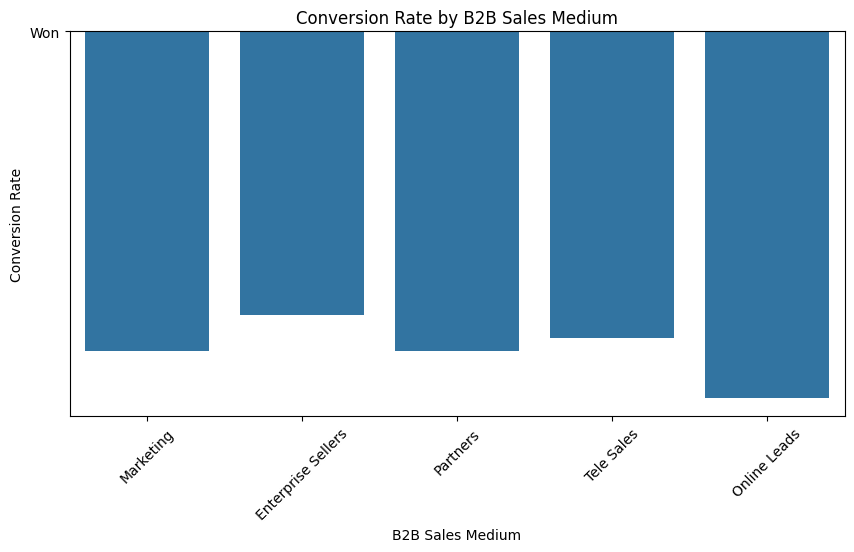

In [20]:
if 'df' in globals():
	plt.figure(figsize=(10,5))
	sns.barplot(data=df, x='B2B Sales Medium', y='Opportunity Status', estimator=lambda x: sum(x)/len(x), ci=None)
	plt.title('Conversion Rate by B2B Sales Medium')
	plt.xticks(rotation=45)
	plt.ylabel('Conversion Rate')
	plt.show()
else:
	print("DataFrame 'df' is not defined. Please run the cell that loads the data first.")

/var/folders/4k/g_m21ftn66s0_p4_76fq2czr0000gn/T/ipykernel_87753/1220909991.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Technology\nPrimary', y='Opportunity Status', estimator=lambda x: sum(x)/len(x), ci=None)


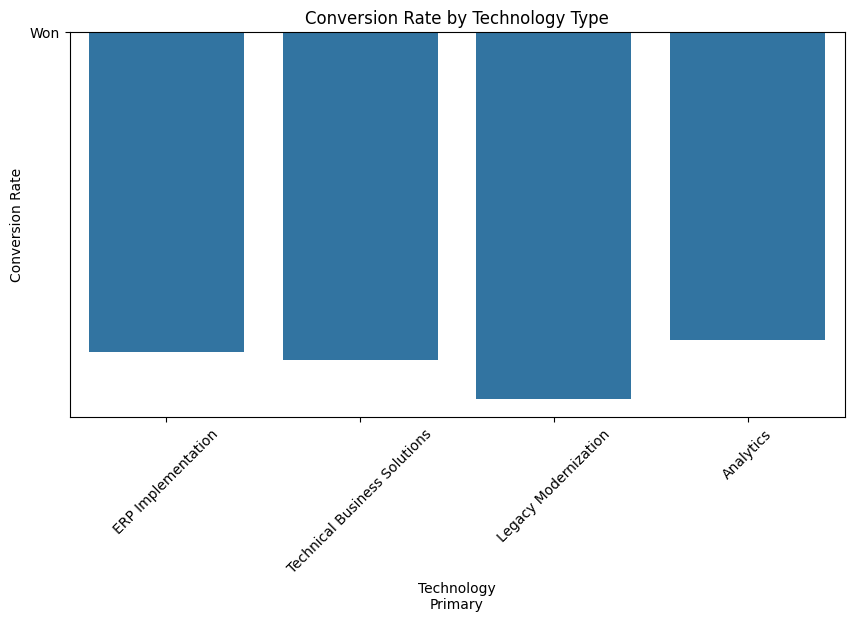

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Technology\nPrimary', y='Opportunity Status', estimator=lambda x: sum(x)/len(x), ci=None)
plt.title('Conversion Rate by Technology Type')
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate')
plt.show()

/var/folders/4k/g_m21ftn66s0_p4_76fq2czr0000gn/T/ipykernel_87753/1562773229.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Deal Size Bucket', y='Opportunity Status', estimator=lambda x: sum(x)/len(x), ci=None)


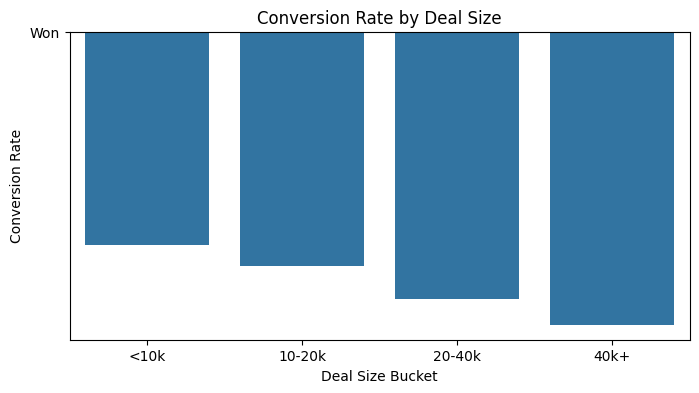

In [21]:
df['Deal Size Bucket'] = pd.cut(df['Opportunity Size (USD)'], bins=[0, 10000, 20000, 40000, 100000], labels=['<10k','10-20k','20-40k','40k+'])
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Deal Size Bucket', y='Opportunity Status', estimator=lambda x: sum(x)/len(x), ci=None)
plt.title('Conversion Rate by Deal Size')
plt.ylabel('Conversion Rate')
plt.show()

/var/folders/4k/g_m21ftn66s0_p4_76fq2czr0000gn/T/ipykernel_87753/3681939764.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Compete Intel', y='Opportunity Status', estimator=lambda x: sum(x)/len(x), ci=None)


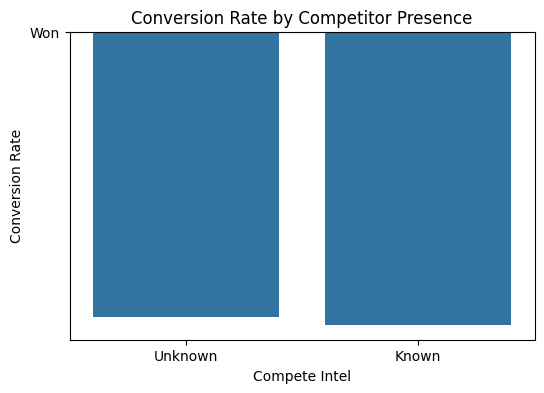

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Compete Intel', y='Opportunity Status', estimator=lambda x: sum(x)/len(x), ci=None)
plt.title('Conversion Rate by Competitor Presence')
plt.ylabel('Conversion Rate')
plt.show()

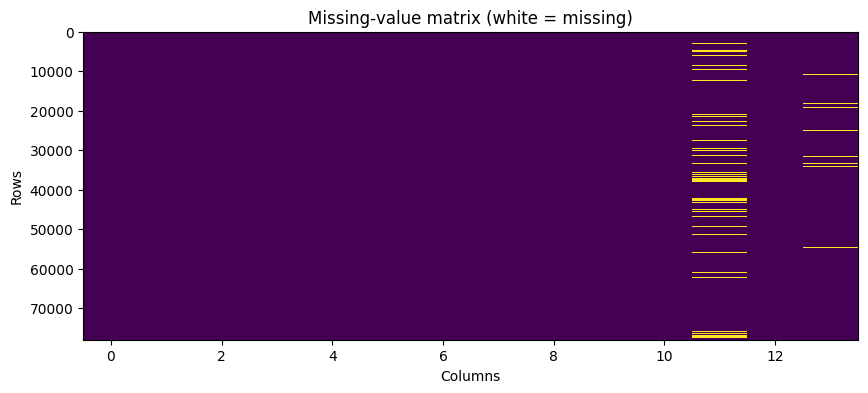

In [23]:
# Missing‑value heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.imshow(df.isna(), aspect='auto', interpolation='nearest')
plt.title('Missing‑value matrix (white = missing)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [24]:
# Target distribution
target_col = 'Opportunity Status'  # use an existing column
print(df[target_col].value_counts(normalize=True))

Opportunity Status
Loss    0.774085
Won     0.225915
Name: proportion, dtype: float64


In [26]:
# Example categorical variable breakdown
cat = 'B2B Sales Medium'  # use an existing column
df.groupby(cat)[target_col].value_counts(normalize=True).unstack().head(10)

Opportunity Status,Loss,Won
B2B Sales Medium,,
Enterprise Sellers,0.724265,0.275735
Marketing,0.814288,0.185712
Online Leads,0.935380,0.064620
Partners,0.814776,0.185224
Tele Sales,0.781028,0.218972


## 4 · Feature Engineering & Pre‑processing

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

y = df[target_col]
X = df.drop(columns=[target_col])

num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object','category']).columns

preprocess = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num_cols),
        ('cat', Pipeline(steps=[('onehot', pd.get_dummies)]), cat_cols)
    ],
    remainder='drop'
)


## 5 · Train‑Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape, X_test.shape)

(62420, 13) (15605, 13)


## 6 · Model Building (Keras)

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Simple dense network
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Convert target labels to binary (0/1)
y_train_bin = (y_train == 'Won').astype(int)

# Fit the preprocessor on training data and transform both train and test sets
preprocess.fit(X_train)
X_train_prep = preprocess.transform(X_train)
X_test_prep = preprocess.transform(X_test)

# Rebuild the model with correct input shape after preprocessing
import tensorflow as tf
from tensorflow.keras import layers, models

input_dim = X_train_prep.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

history = model.fit(X_train_prep, y_train_bin,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=32,
                    verbose=1)

Epoch 1/30
1561/1561 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8033 - auc: 0.7417 - loss: 0.4597 - val_accuracy: 0.8318 - val_auc: 0.8176 - val_loss: 0.4031
Epoch 2/30
1561/1561 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9114 - auc: 0.9562 - loss: 0.2209 - val_accuracy: 0.7361 - val_auc: 0.7528 - val_loss: 0.5355
Epoch 3/30
1561/1561 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9999 - auc: 1.0000 - loss: 5.9243e-04 - val_accuracy: 0.8271 - val_auc: 0.8034 - val_loss: 0.4142
Epoch 4/30
1561/1561 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 7.0710e-05 - val_accuracy: 0.8208 - val_auc: 0.8024 - val_loss: 0.4295
Epoch 5/30
1561/1561 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 3.8190e-05 - val_accuracy: 0.8170 - val_auc: 0.8038 - val_loss: 0.4345
Epoch 6/30
1561/1561 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 2.0302e-05 - val_accuracy: 0.8157 - val_auc: 0.8026 - val_loss: 0.4387
Epoch 

## 7 · Evaluation

In [34]:
y_pred_prob = model.predict(X_test_prep).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)
y_test_bin = (y_test == 'Won').astype(int)

print("Accuracy:", accuracy_score(y_test_bin, y_pred))
print("ROC‑AUC:", roc_auc_score(y_test_bin, y_pred_prob))
print(classification_report(y_test_bin, y_pred))

488/488 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.8157000961230375
ROC‑AUC: 0.8033430322671551
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     12080
           1       0.82      0.24      0.37      3525

    accuracy                           0.82     15605
   macro avg       0.82      0.61      0.63     15605
weighted avg       0.82      0.82      0.77     15605



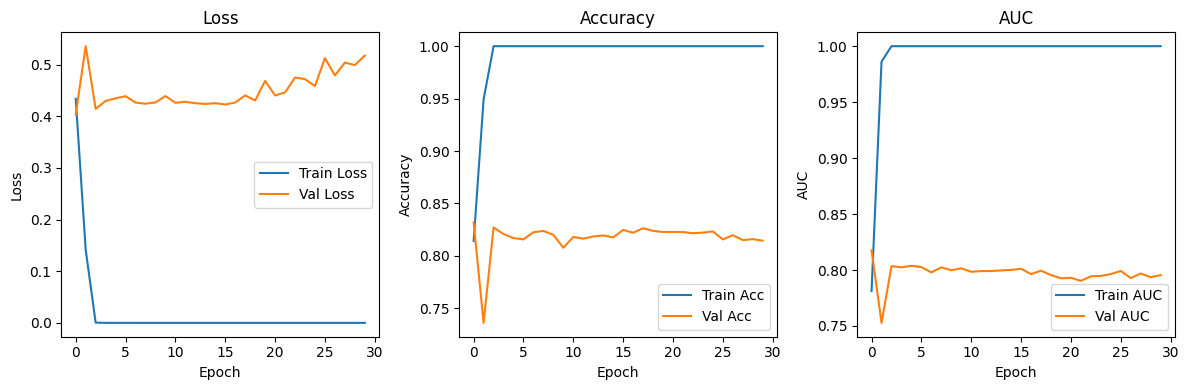

In [35]:
# Plot training & validation loss and metrics from Keras history
plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,3,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,3,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# AUC
plt.subplot(1,3,3)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Val AUC')
plt.title('AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()